# Handling outliers 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
df = pd.read_csv("Dataset/titanic.csv")

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df['Age'].isnull().sum()

177

C:\Users\papal\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


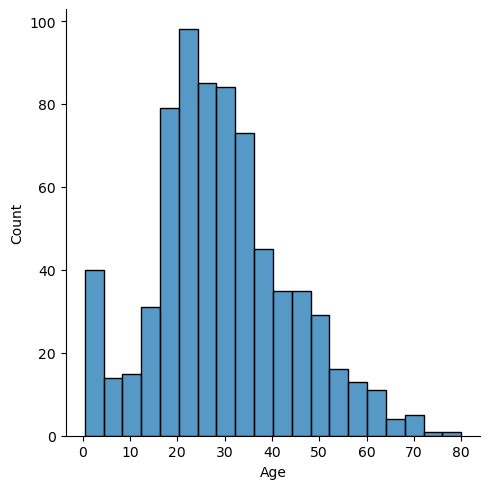

In [5]:
sns.displot(df['Age'].dropna())

C:\Users\papal\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


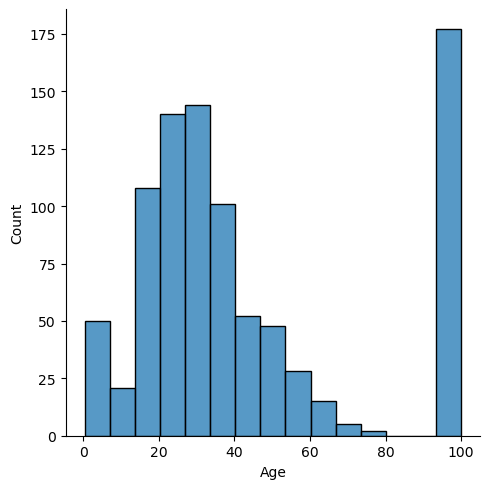

In [6]:
sns.displot(df['Age'].fillna(100))

# Gaussian Distributed

Text(0, 0.5, 'No of people')

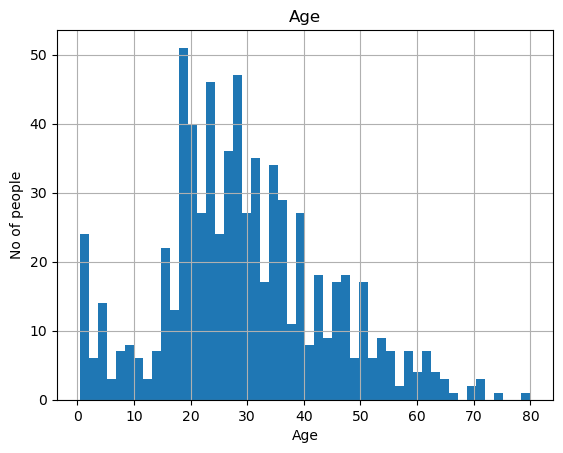

In [7]:
fig = df.Age.hist(bins=50)
fig.set_title('Age')
fig.set_xlabel('Age')
fig.set_ylabel('No of people')

<Axes: >

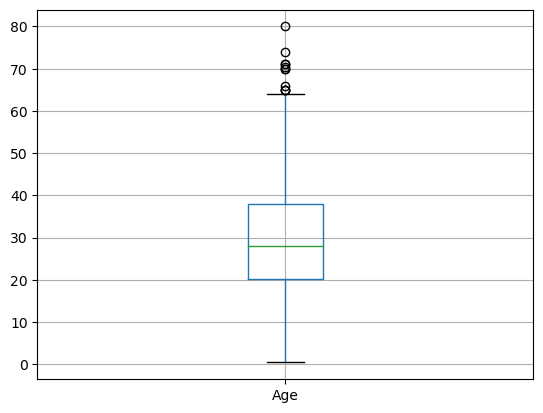

In [8]:
df.boxplot(column="Age")

In [9]:
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

## If The Data Is Normally Distributed We use this

In [10]:
# Assuming Age follows A Gaussian Distribution we will calculate the boundaries which differentiates the outliers

upper_bound = df['Age'].mean() + 3*df['Age'].std()
lower_bound = df['Age'].mean() - 3*df['Age'].std()

In [11]:
print(upper_bound) # values that greater than this that are outliers
print(lower_bound) # ignore negative values (age always postive)

73.27860964406095
-13.88037434994331


In [12]:
data = df.copy()

In [13]:
# remove outliers from dataset
data.loc[data['Age'] >= 73,'Age'] = 73 

Text(0, 0.5, 'No of passenger')

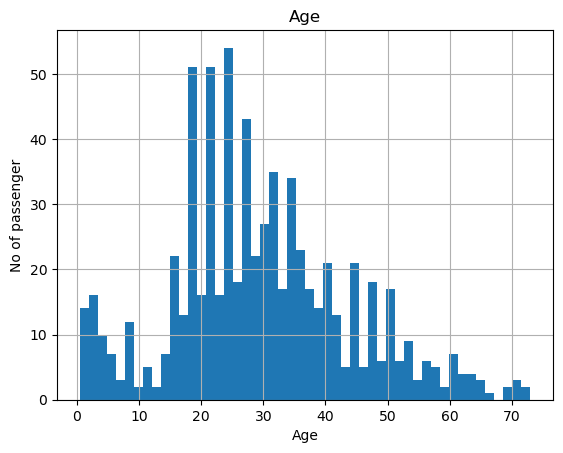

In [14]:
figure=data.Age.hist(bins=50)
figure.set_title('Age')
figure.set_xlabel('Age')
figure.set_ylabel('No of passenger')

## If Features Are Skewed We Use the below Technique

Text(0, 0.5, 'No of passenger')

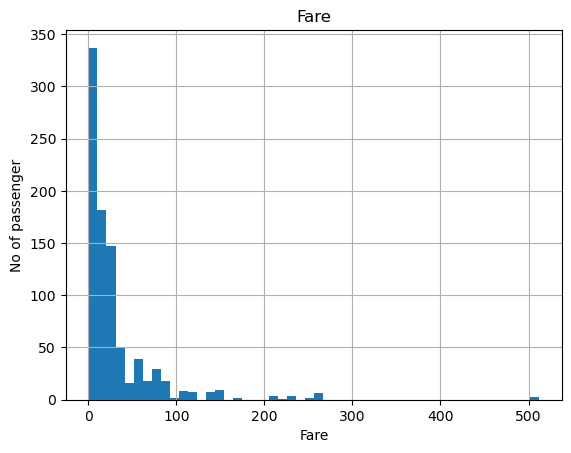

In [15]:
figure=df.Fare.hist(bins=50)
figure.set_title('Fare')
figure.set_xlabel('Fare')
figure.set_ylabel('No of passenger')

<Axes: >

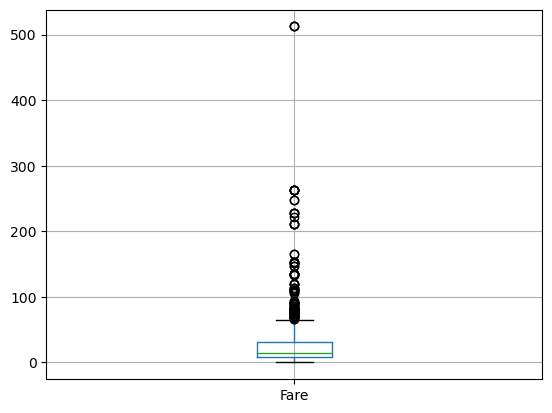

In [16]:
df.boxplot(column='Fare')

In [17]:
df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [18]:
# Lets compute the Interquantile range to calculate the boundaries
IQR = df.Fare.quantile(0.75) - df.Fare.quantile(0.25)

In [19]:
lower_bridge = df['Fare'].quantile(0.25) - (IQR*1.5)
upper_bridge = df['Fare'].quantile(0.75) + (IQR*1.5)

In [20]:
print(lower_bridge)
print(upper_bridge) # values greater than this that are outpliers

-26.724
65.6344


In [21]:
#### Extreme outliers
lower_bridge=df['Fare'].quantile(0.25)-(IQR*3)
upper_bridge=df['Fare'].quantile(0.75)+(IQR*3)
print(lower_bridge), print(upper_bridge)

-61.358399999999996
100.2688


(None, None)

In [22]:
data.loc[data['Fare']>=100,'Fare']=100

Text(0, 0.5, 'No of passenger')

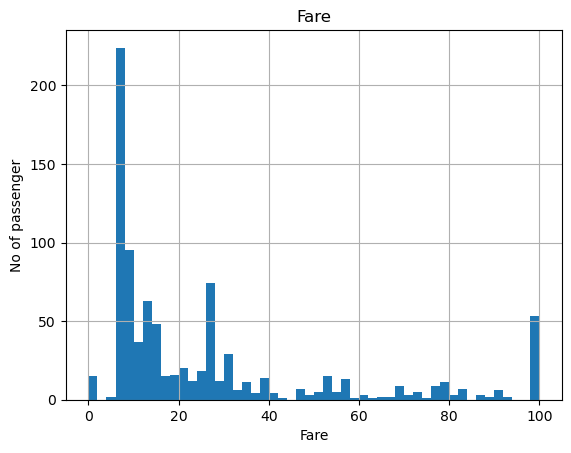

In [23]:
figure=data.Fare.hist(bins=50)
figure.set_title('Fare')
figure.set_xlabel('Fare')
figure.set_ylabel('No of passenger')